<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading 

**Chapter 05 &mdash; Predicting Market Movements with Machine Learning**

## Using Linear Regression for Market Movement Prediction

### A Quick Review of Linear Regression

In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

In [32]:
x = np.linspace(0, 10) # Float number from 1 to 10 , default num is 50

In [33]:
x # numpy.shape = 1 x 50 (vector)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [34]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds() # <4>

In [35]:
y = x + np.random.standard_normal(len(x))  # 生成隨機y值資料

In [36]:
y

array([-1.74976547,  0.54676204,  1.56119907,  0.35980886,  1.79764732,
        1.534627  ,  1.44566947,  0.3585281 ,  1.44315723,  2.09173614,
        1.58278934,  2.68006145,  1.86538454,  3.4699083 ,  3.52986366,
        2.95681335,  2.73402575,  4.49912044,  3.23533377,  2.75923277,
        5.70061431,  5.82731946,  4.23791678,  3.85144181,  5.08247787,
        6.03912302,  6.03712279,  6.87176021,  5.38804766,  5.97404336,
        6.34484859,  4.88331362,  5.77425994,  7.55114789,  7.68922027,
        6.68691022,  8.53656104,  5.86040358,  6.39870299,  6.72674916,
        7.61882614,  7.6991752 ,  8.57874313,  8.16257147, 10.27933991,
        7.45057785,  8.404445  ,  9.94934449,  8.18233986, 11.47071387])

In [37]:
reg = np.polyfit(x, y, deg=1)  # 一次方的ＯＬＳ回歸（線性回歸）

In [38]:
reg # 最佳參數值

array([0.94612934, 0.22855261])

In [39]:
np.polyval(reg, x)

array([0.22855261, 0.42164023, 0.61472785, 0.80781547, 1.00090309,
       1.19399071, 1.38707833, 1.58016595, 1.77325357, 1.96634119,
       2.15942881, 2.35251643, 2.54560404, 2.73869166, 2.93177928,
       3.1248669 , 3.31795452, 3.51104214, 3.70412976, 3.89721738,
       4.090305  , 4.28339262, 4.47648024, 4.66956786, 4.86265548,
       5.0557431 , 5.24883072, 5.44191834, 5.63500596, 5.82809358,
       6.0211812 , 6.21426882, 6.40735644, 6.60044406, 6.79353168,
       6.9866193 , 7.17970692, 7.37279454, 7.56588216, 7.75896978,
       7.9520574 , 8.14514502, 8.33823264, 8.53132026, 8.72440788,
       8.9174955 , 9.11058312, 9.30367074, 9.49675836, 9.68984598])

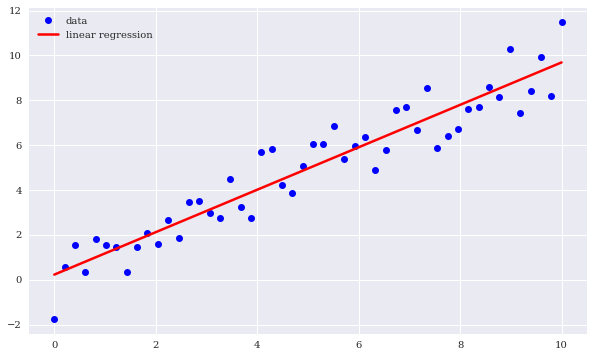

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, # x 為 0 到 10 , y 為點 ，畫成一直線
         label='linear regression')
plt.legend(loc=0);
# plt.savefig('../../images/ch05/lr_plot_1.png')

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


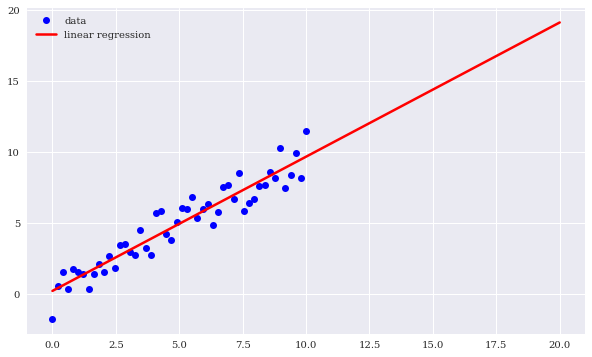

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)
print(xn)
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5,  # 現在xn為 0 到 20 , polyval也可以找出10~20-的點
         label='linear regression')
plt.legend(loc=0);
# plt.savefig('../../images/ch05/lr_plot_2.png')

### The Basic Idea for Price Prediction

In [42]:
x = np.arange(12)

In [43]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [44]:
lags = 3  # lag <- 滯後量 ， 3 <- 前天、昨天、今天

In [45]:
m = np.zeros((lags + 1, len(x) - lags))

In [46]:
m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [47]:
m[lags] = x[lags:]  # index=3 -> 應變數 3 - 11
print(m)
for i in range(lags): # index=0~2 -> 自變數
    m[i] = x[i:i - lags] # i=0, 0-8 ; i=1, 1-9 ; i=2, 2-10 

m.T

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11.]]


array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [48]:
x[0:-3]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [49]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0] # 線性OLS回歸

In [50]:
reg # 最佳參數

array([-0.66666667,  0.33333333,  1.33333333])

In [51]:
np.dot(m[:lags].T, reg) #運用點積找出預測結果

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### Predicting Index Levels

In [3]:
import pandas as pd

In [4]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()

In [54]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [55]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [56]:
symbol = 'EUR='

In [64]:
data = pd.DataFrame(raw[symbol])

In [65]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [66]:
data.head(10)

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
2010-01-11,1.4513
2010-01-12,1.4494
2010-01-13,1.4510
2010-01-14,1.4502


In [67]:
lags = 5

In [68]:
cols = []
for lag in range(1, lags + 1): #  i <- 1 ~5
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag) # <1> 移動
    cols.append(col)
data.dropna(inplace=True)

In [69]:
data.head()   # 4,5,6,7,8 -> 11

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412


In [77]:
data[cols]

,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,
2010-01-11,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4510,1.4494,1.4513,1.4412,1.4318
2010-01-15,1.4502,1.4510,1.4494,1.4513,1.4412
...,...,...,...,...,...
2019-12-24,1.1086,1.1078,1.1120,1.1111,1.1149
2019-12-26,1.1087,1.1086,1.1078,1.1120,1.1111
2019-12-27,1.1096,1.1087,1.1086,1.1078,1.1120


In [80]:
reg = np.linalg.lstsq(data[cols], data['price'],
                      rcond=None)[0]

In [81]:
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [82]:
data['prediction'] = np.dot(data[cols], reg)

In [83]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
Date,,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411,1.440583
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368,1.451482
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412,1.448865
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318,1.450505
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412,1.450238


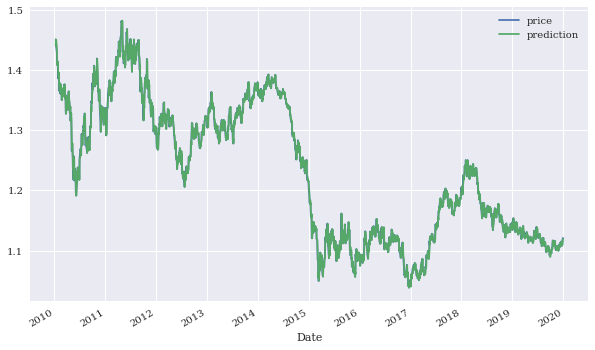

In [75]:
data[['price', 'prediction']].plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/lr_plot_3.png')

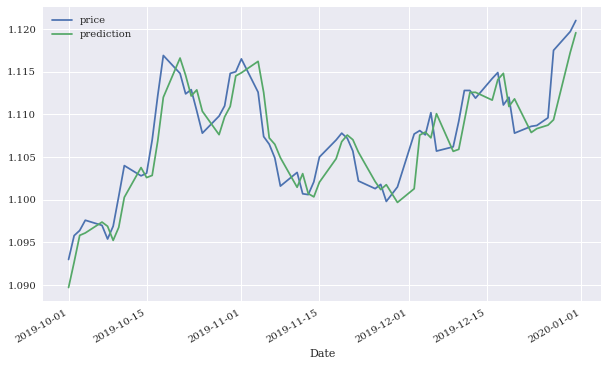

In [84]:
data[['price', 'prediction']].loc['2019-10-1':].plot(
            figsize=(10, 6));
# plt.savefig('../../images/ch05/lr_plot_4.png')

### Predicting Future Returns

In [85]:
data['return'] = np.log(data['price'] /
                         data['price'].shift(1)) # 一天的對數報酬率

In [86]:
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411,1.440583,NaN
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368,1.451482,-0.001310
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412,1.448865,0.001103
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318,1.450505,-0.000551
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412,1.450238,-0.008309
...,...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149,1.108330,0.000090
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111,1.108738,0.000811
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120,1.109368,0.007094


In [87]:
data.dropna(inplace=True)

In [88]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag) # <3> # 這次用return 做出lag滯後量
    cols.append(col)
data.dropna(inplace=True)

In [89]:
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.429671,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.410560,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.408829,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.414101,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.414653,-0.005457
...,...,...,...,...,...,...,...,...
2019-12-24,1.1087,0.000722,-0.003784,0.000810,-0.003414,0.000628,1.108330,0.000090
2019-12-26,1.1096,0.000090,0.000722,-0.003784,0.000810,-0.003414,1.108738,0.000811
2019-12-27,1.1175,0.000811,0.000090,0.000722,-0.003784,0.000810,1.109368,0.007094


In [90]:
reg = np.linalg.lstsq(data[cols], data['return'], 
                      rcond=None)[0]  # lag與return 的 迴歸

In [91]:
reg

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

In [96]:
data['prediction'] = np.dot(data[cols], reg)

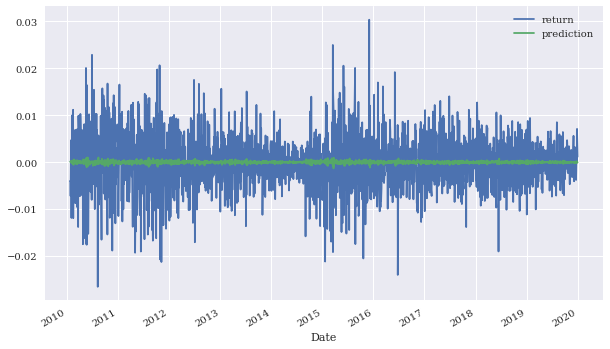

In [97]:
data[['return', 'prediction']].iloc[lags:].plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/lr_plot_5.png')

In [98]:
hits = np.sign(data['return'] *
               data['prediction']).value_counts()

In [99]:
hits # 正確為1 錯誤為-1

 1.0    1250
-1.0    1242
 0.0      13
dtype: int64

In [100]:
hits.values[0] / sum(hits)

0.499001996007984

### Prediction Future Market Direction

In [101]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']),
                      rcond=None)[0]

In [103]:
np.sign(data['return'])

Date
2010-01-20   -1.0
2010-01-21   -1.0
2010-01-22    1.0
2010-01-25    1.0
2010-01-26   -1.0
             ... 
2019-12-24    1.0
2019-12-26    1.0
2019-12-27    1.0
2019-12-30    1.0
2019-12-31    1.0
Name: return, Length: 2505, dtype: float64

In [104]:
reg

array([-5.11938725, -2.24077248, -5.13080606, -3.03753232, -2.14819119])

In [105]:
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [106]:
data['prediction'].value_counts()

 1.0    1300
-1.0    1205
Name: prediction, dtype: int64

In [107]:
hits = np.sign(data['return'] *
               data['prediction']).value_counts()

In [108]:
hits

 1.0    1301
-1.0    1191
 0.0      13
dtype: int64

In [109]:
hits.values[0] / sum(hits)

0.5193612774451097

### Vectorized Backtesting of Regression-based Strategy 

In [110]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.0,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.0,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.0,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.0,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.0,-0.005457


In [111]:
data['strategy'] = data['prediction'] * data['return']

In [112]:
data[['return', 'strategy']].sum().apply(np.exp)

return      0.784026
strategy    1.654154
dtype: float64

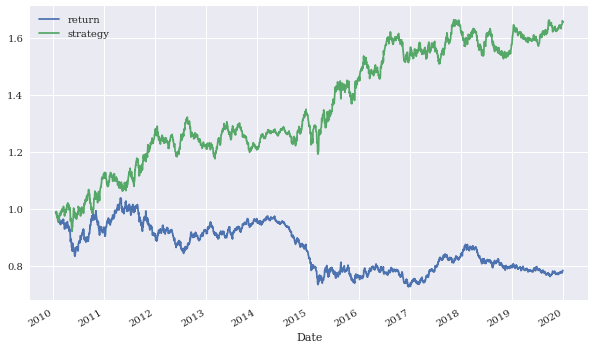

In [113]:
data[['return', 'strategy']].dropna().cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/lr_plot_6.png')

### Generalizing the Approach

In [114]:
import LRVectorBacktester as LR

In [115]:
lrbt = LR.LRVectorBacktester('EUR=', '2010-1-1', '2019-12-31',
                                     10000, 0.0)

In [116]:
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=5) # 相同資料訓練與評估

(17166.53, 9442.42)

In [119]:
lrbt.run_strategy('2010-1-1', '2017-12-31',
                  '2018-1-1', '2019-12-31', lags=5) # 不同資料訓練與評估

(10160.86, 791.87)

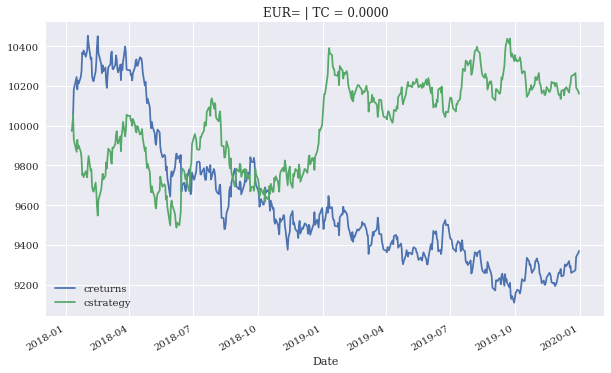

In [120]:
lrbt.plot_results()
# plt.savefig('../../images/ch05/lr_plot_7.png')

In [121]:
lrbt = LR.LRVectorBacktester('GDX', '2010-1-1', '2019-12-31',
                                     10000, 0.002)  # 換黃金ETF

In [122]:
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=7)  

(23642.32, 17649.69)

In [123]:
lrbt.run_strategy('2010-1-1', '2014-12-31',
                  '2015-1-1', '2019-12-31', lags=7)

(28513.35, 14888.41)

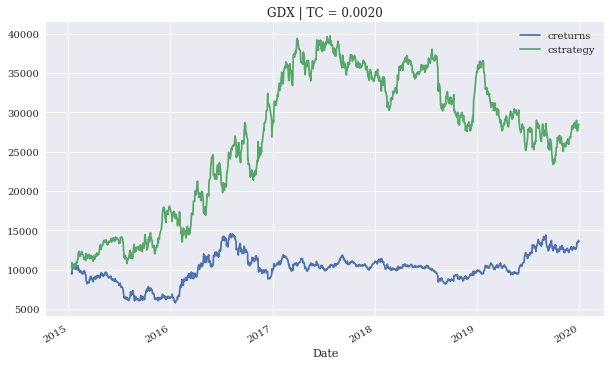

In [124]:
lrbt.plot_results()
# plt.savefig('../../images/ch05/lr_plot_8.png')

## Using Machine Learning for Market Movement Prediction

### Linear Regression with scikit-learn

In [125]:
x = np.arange(12)

In [126]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [127]:
lags = 3

In [128]:
m = np.zeros((lags + 1, len(x) - lags))

In [129]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [131]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [3]:
from sklearn import linear_model

In [132]:
lm = linear_model.LinearRegression()

In [133]:
lm.fit(m[:lags].T, m[lags])

LinearRegression()

In [134]:
lm.coef_ 

array([0.33333333, 0.33333333, 0.33333333])

In [135]:
lm.intercept_ # 截距

2.0

In [136]:
lm.predict(m[:lags].T) # 簡化了 np.dot(array,reg) 求 predict

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [137]:
lm = linear_model.LinearRegression(fit_intercept=False) # 在不使用截距值的狀況強行套入

In [140]:
lm.fit(m[:lags].T, m[lags])

LinearRegression(fit_intercept=False)

In [141]:
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [142]:
lm.intercept_

0.0

In [143]:
lm.predict(m[:lags].T) # # 簡化了np.linalg.lstsq的方法

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### A Simple Classification Problem

In [144]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5]) # 學生的學習時數

In [145]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1]) # 是否及格 （順序必須一致）

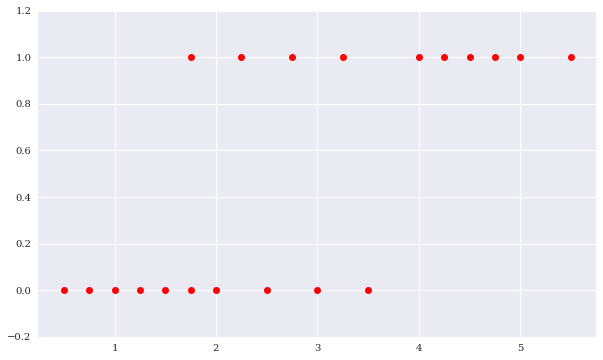

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.ylim(-0.2, 1.2);
# plt.savefig('../../images/ch05/ml_plot_1.png')

In [147]:
reg = np.polyfit(hours, success, deg=1)

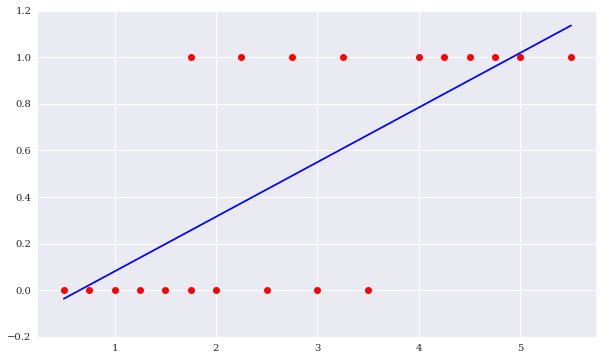

In [148]:
# 對學習時數預測小學生會不會及格 (LR)
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2);
# plt.savefig('../../images/ch05/ml_plot_2.png')

In [149]:
lm = linear_model.LogisticRegression(solver='lbfgs')

In [150]:
hrs = hours.reshape(1, -1).T

In [151]:
hrs

array([[0.5 ],
       [0.75],
       [1.  ],
       [1.25],
       [1.5 ],
       [1.75],
       [1.75],
       [2.  ],
       [2.25],
       [2.5 ],
       [2.75],
       [3.  ],
       [3.25],
       [3.5 ],
       [4.  ],
       [4.25],
       [4.5 ],
       [4.75],
       [5.  ],
       [5.5 ]])

In [155]:
print(hrs.shape, success.shape)

(20, 1) (20,)


In [152]:
lm.fit(hrs, success) # (20 x 1) * (1 * 20)  

LogisticRegression()

In [153]:
prediction = lm.predict(hrs)

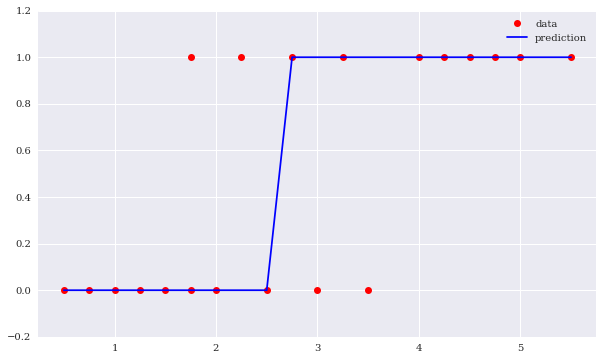

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro', label='data') 
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0)
plt.ylim(-0.2, 1.2);
# plt.savefig('../../images/ch05/ml_plot_3.png')

In [156]:
prob = lm.predict_proba(hrs)

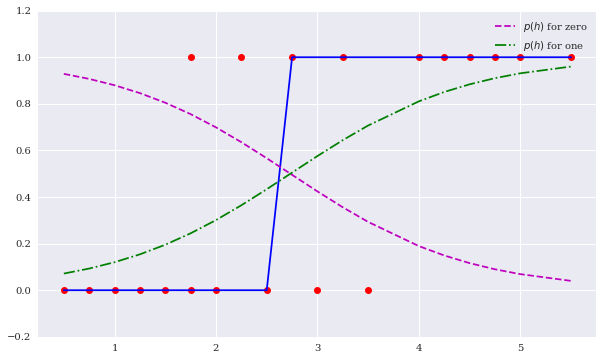

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b')
plt.plot(hours, prob.T[0], 'm--',
         label='$p(h)$ for zero')   # 不及格機率
plt.plot(hours, prob.T[1], 'g-.',
         label='$p(h)$ for one')    # 及格機率
plt.ylim(-0.2, 1.2)
plt.legend(loc=0);
# plt.savefig('../../images/ch05/ml_plot_4.png')

### Using Logistic Regression to Predict Market Direction

In [11]:
import numpy as np

In [7]:
symbol = 'GLD'

In [8]:
data = pd.DataFrame(raw[symbol])

In [12]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [13]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [14]:
data.dropna(inplace=True)

In [15]:
lags = 3

In [16]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag)
    cols.append(col)

In [17]:
data.dropna(inplace=True)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=1000) # C 正則化函數

In [32]:
data[cols]

,lag_1,lag_2,lag_3
Date,,,
2010-01-08,-0.006207,0.016365,-0.000911
2010-01-11,0.004951,-0.006207,0.016365
2010-01-12,0.013202,0.004951,-0.006207
2010-01-13,-0.021134,0.013202,0.004951
2010-01-14,0.009458,-0.021134,0.013202
...,...,...,...
2019-12-24,0.003077,0.001004,0.002586
2019-12-26,0.009388,0.003077,0.001004
2019-12-27,0.007827,0.009388,0.003077


In [33]:
data['return']

Date
2010-01-08    0.004951
2010-01-11    0.013202
2010-01-12   -0.021134
2010-01-13    0.009458
2010-01-14    0.004383
                ...   
2019-12-24    0.009388
2019-12-26    0.007827
2019-12-27   -0.000351
2019-12-30    0.002106
2019-12-31    0.001891
Name: return, Length: 2512, dtype: float64

In [34]:
np.sign(data['return'])

Date
2010-01-08    1.0
2010-01-11    1.0
2010-01-12   -1.0
2010-01-13    1.0
2010-01-14    1.0
             ... 
2019-12-24    1.0
2019-12-26    1.0
2019-12-27   -1.0
2019-12-30    1.0
2019-12-31    1.0
Name: return, Length: 2512, dtype: float64

In [20]:
lm.fit(data[cols], np.sign(data['return'])) # 找出最佳解 sign 

LogisticRegression(C=10000000.0, max_iter=1000)

In [21]:
data['prediction'] = lm.predict(data[cols]) # cols 乘上最佳解 np.sign 大於0 -> 1 小於0 -> -1 不精準因為predict 出來的

In [22]:
data.head()

,price,return,lag_1,lag_2,lag_3,prediction
Date,,,,,,
2010-01-08,111.37,0.004951,-0.006207,0.016365,-0.000911,1.0
2010-01-11,112.85,0.013202,0.004951,-0.006207,0.016365,1.0
2010-01-12,110.49,-0.021134,0.013202,0.004951,-0.006207,-1.0
2010-01-13,111.54,0.009458,-0.021134,0.013202,0.004951,1.0
2010-01-14,112.03,0.004383,0.009458,-0.021134,0.013202,-1.0


In [23]:
data['prediction'].value_counts() # 1 作多 -1 放空-1

 1.0    1983
-1.0     529
Name: prediction, dtype: int64

In [24]:
hits = np.sign(data['return'].iloc[lags:] *
               data['prediction'].iloc[lags:]
              ).value_counts()

In [25]:
hits  # 1 -> TP , -1 -> FP&FN , 0 TN

 1.0    1338
-1.0    1159
 0.0      12
dtype: int64

In [35]:
accuracy_score(data['prediction'],
               np.sign(data['return'])) # 準確度

0.5338375796178344

In [27]:
data['strategy'] = data['prediction'] * data['return'] 

In [28]:
data[['return', 'strategy']].sum().apply(np.exp) #總體績效表現 對數 後 加總

return      1.289478
strategy    2.458716
dtype: float64

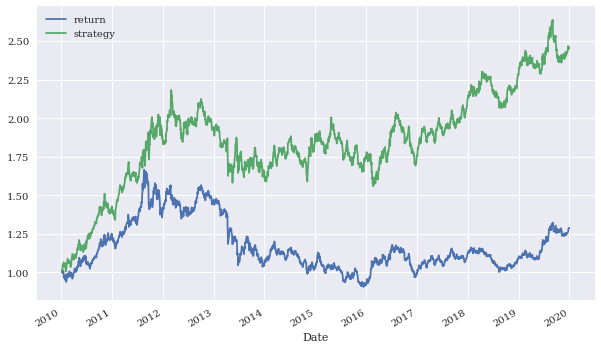

In [31]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));
# plt.savefig('../../images/ch05/ml_plot_5.png')

In [108]:
data = pd.DataFrame(raw[symbol])

In [109]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [110]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [111]:
lags = 5  # 剛剛例子用3 這次用5

In [112]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_%d' % lag
    data[col] = data['price'].shift(lag)
    cols.append(col)

In [113]:
data.dropna(inplace=True)

In [114]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
data['prediction'] = lm.predict(data[cols])

In [116]:
data['prediction'].value_counts()

 1.0    2047
-1.0     464
Name: prediction, dtype: int64

In [117]:
hits = np.sign(data['return'].iloc[lags:] *
               data['prediction'].iloc[lags:]
              ).value_counts()

In [118]:
hits

 1.0    1331
-1.0    1163
 0.0      12
dtype: int64

In [119]:
accuracy_score(data['prediction'],
               np.sign(data['return'])) # 跟剛剛差不多0.53

0.5312624452409399

In [120]:
data['strategy'] = data['prediction'] * data['return']

In [121]:
data[['return', 'strategy']].sum().apply(np.exp) # 剛剛2.4587

return      1.283110
strategy    2.656833
dtype: float64

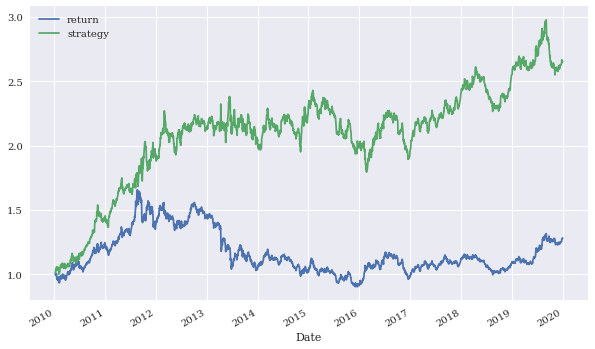

In [122]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));
# plt.savefig('../../images/ch05/ml_plot_6.png')

### Generalizing the Approach

In [5]:
import ScikitVectorBacktester as SCI

In [6]:
scibt = SCI.ScikitVectorBacktester('EUR=',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.0, 'logistic')

In [7]:
scibt.run_strategy('2015-1-1', '2019-12-31',
                   '2015-1-1', '2019-12-31', lags=15)

(Date
 2015-01-26    10026.768984
 2015-01-27    10155.260105
 2015-01-28    10070.491657
 2015-01-29    10099.937539
 2015-01-30    10070.491657
                   ...     
 2019-12-24    12153.758790
 2019-12-26    12143.900838
 2019-12-27    12230.361560
 2019-12-30    12206.331199
 2019-12-31    12192.175774
 Name: cstrategy, Length: 1243, dtype: float64,
 '\n',
 Date
 2015-01-26    10026.768984
 2015-01-27    10155.260105
 2015-01-28    10070.491657
 2015-01-29    10099.937539
 2015-01-30    10070.491657
                   ...     
 2019-12-24     9892.924065
 2019-12-26     9900.954760
 2019-12-27     9971.446417
 2019-12-30     9991.077005
 2019-12-31    10002.676898
 Name: creturns, Length: 1243, dtype: float64,
 12192.18,
 2189.5)

In [8]:
scibt.run_strategy('2016-1-1', '2018-12-31',
                   '2019-1-1', '2019-12-31', lags=15)

(Date
 2019-01-24    10066.342326
 2019-01-25    10161.618631
 2019-01-28    10142.953890
 2019-01-29    10145.616082
 2019-01-30    10187.334714
                   ...     
 2019-12-24    10547.204694
 2019-12-26    10538.649824
 2019-12-27    10613.681668
 2019-12-30    10592.827778
 2019-12-31    10580.543500
 Name: cstrategy, Length: 237, dtype: float64,
 '\n',
 Date
 2019-01-24     9934.094903
 2019-01-25    10028.119508
 2019-01-28    10046.572935
 2019-01-29    10043.936731
 2019-01-30    10085.237258
                   ...     
 2019-12-24     9742.530756
 2019-12-26     9750.439367
 2019-12-27     9819.859402
 2019-12-30     9839.191564
 2019-12-31     9850.615114
 Name: creturns, Length: 237, dtype: float64,
 10580.54,
 729.93)

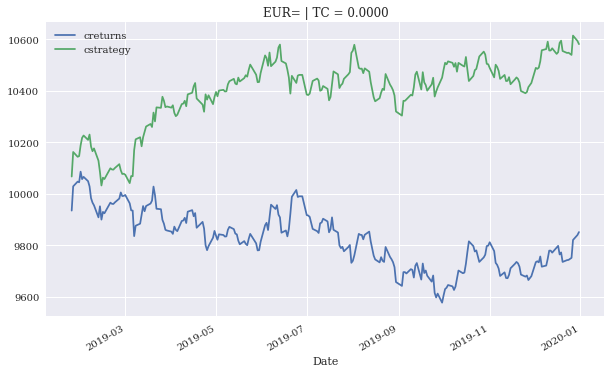

In [9]:
scibt.plot_results()
# plt.savefig('../../images/ch05/ml_plot_7.png')

In [10]:
scibt = SCI.ScikitVectorBacktester('GDX',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.00, 'logistic')

In [11]:
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)

(Date
 2018-01-17    10179.615706
 2018-01-18    10039.295189
 2018-01-19    10056.303736
 2018-01-22    10081.816558
 2018-01-23    10247.649896
                   ...     
 2018-12-24    13146.642258
 2018-12-26    13446.298993
 2018-12-27    13221.873401
 2018-12-28    12988.583313
 2018-12-31    12686.809684
 Name: cstrategy, Length: 241, dtype: float64,
 '\n',
 Date
 2018-01-17    9823.553549
 2018-01-18    9688.141157
 2018-01-19    9704.554780
 2018-01-22    9729.175215
 2018-01-23    9889.208043
                  ...     
 2018-12-24    8654.082889
 2018-12-26    8461.222815
 2018-12-27    8604.842019
 2018-12-28    8453.016003
 2018-12-31    8654.082889
 Name: creturns, Length: 241, dtype: float64,
 12686.81,
 4032.73)

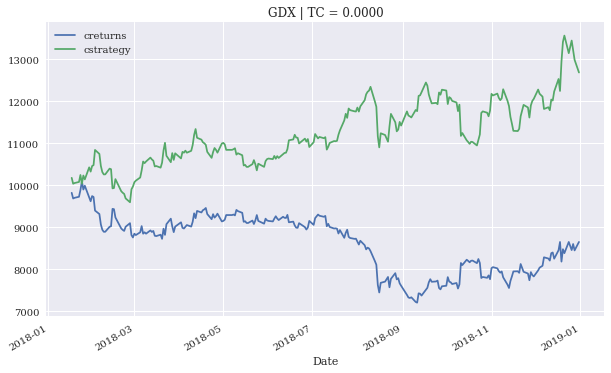

In [12]:
scibt.plot_results()
# plt.savefig('../../images/ch05/ml_plot_8.png')

In [44]:
scibt = SCI.ScikitVectorBacktester('GDX',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.0025, 'logistic')

In [45]:
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)

(9588.48, 934.4)

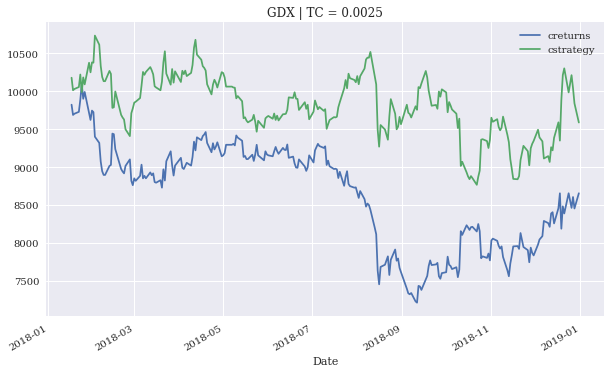

In [46]:
scibt.plot_results()
# plt.savefig('../../images/ch05/ml_plot_8_a.png')

## Using Deep Learning for Market Movement Prediction

#### The Simple Classification Problem Revisited 

In [13]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [14]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1]) 

In [15]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hours    20 non-null     float64
 1   success  20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
model = MLPClassifier(hidden_layer_sizes=[32],
                     max_iter=1000, random_state=100)

In [19]:
model.fit(data['hours'].values.reshape(-1, 1), data['success'])

MLPClassifier(hidden_layer_sizes=[32], max_iter=1000, random_state=100)

In [20]:
data['prediction'] = model.predict(data['hours'].values.reshape(-1, 1)) # <2>

In [21]:
data.tail()

,hours,success,prediction
15,4.25,1,1
16,4.50,1,1
17,4.75,1,1
18,5.00,1,1
19,5.50,1,1


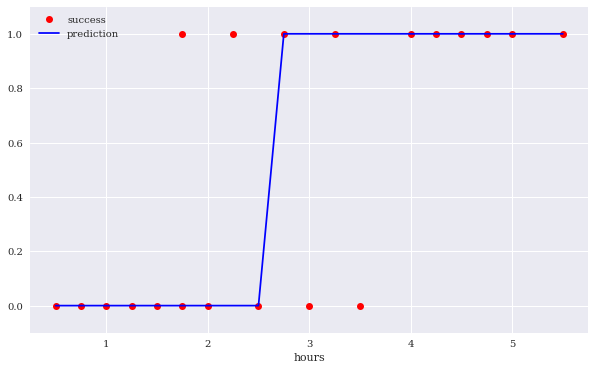

In [22]:
data.plot(x='hours', y=['success', 'prediction'],
          style=['ro', 'b-'], ylim=[-.1, 1.1],
          figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_1.png')

### Using Deep Neural Networks to Predict Market Direction

In [144]:
symbol = 'EUR='

In [145]:
data = pd.DataFrame(raw[symbol])

In [146]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [147]:
data['return'] = np.log(data['price'] /
                         data['price'].shift(1)) 

In [148]:
data['direction'] = np.where(data['return'] > 0, 1, 0)

In [149]:
lags = 5


In [150]:
cols = []
for lag in range(1, lags + 1): # <5>
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag) # <6>
    cols.append(col)
data.dropna(inplace=True) # <7>

In [151]:
data.round(4).tail()

,price,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,
2019-12-24,1.1087,0.0001,1,0.0007,-0.0038,0.0008,-0.0034,0.0006
2019-12-26,1.1096,0.0008,1,0.0001,0.0007,-0.0038,0.0008,-0.0034
2019-12-27,1.1175,0.0071,1,0.0008,0.0001,0.0007,-0.0038,0.0008
2019-12-30,1.1197,0.0020,1,0.0071,0.0008,0.0001,0.0007,-0.0038
2019-12-31,1.1210,0.0012,1,0.0020,0.0071,0.0008,0.0001,0.0007


In [152]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam

Using TensorFlow backend.


In [153]:
optimizer = adam(learning_rate=0.0001)

In [154]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)

In [155]:
set_seeds()
model = Sequential()
model.add(Dense(64, activation='relu',
        input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # <5>
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [156]:
cutoff = '2017-12-31'

In [157]:
training_data = data[data.index < cutoff].copy()

In [158]:
mu, std = training_data.mean(), training_data.std()

In [159]:
training_data_ = (training_data - mu) / std

In [160]:
test_data = data[data.index >= cutoff].copy()

In [161]:
test_data_ = (test_data - mu) / std

In [162]:
%%time
model.fit(training_data[cols],
          training_data['direction'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False)

CPU times: user 5.15 s, sys: 919 ms, total: 6.07 s
Wall time: 3.33 s


In [163]:
res = pd.DataFrame(model.history.history)

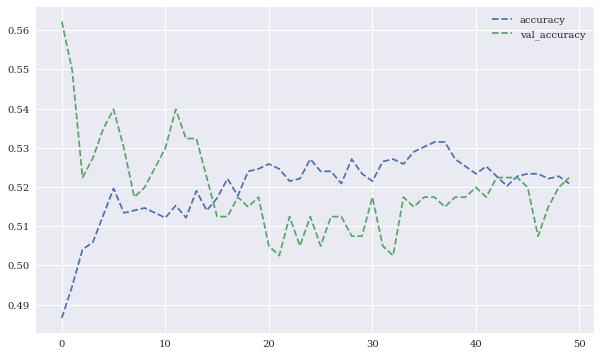

In [164]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');
# plt.savefig('../../images/ch05/dnn_plot_metrics.png')

In [165]:
model.evaluate(training_data_[cols], training_data['direction'])

2007/2007 [==============================] - 0s 15us/step


[0.7528249417957407, 0.5151968002319336]

In [166]:
pred = model.predict_classes(training_data_[cols])

In [167]:
pred[:30].flatten()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1], dtype=int32)

In [168]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [169]:
training_data['strategy'] = (training_data['prediction'] *
                            training_data['return'])

In [170]:
training_data[['return', 'strategy']].sum().apply(np.exp)

return      0.826569
strategy    1.238151
dtype: float64

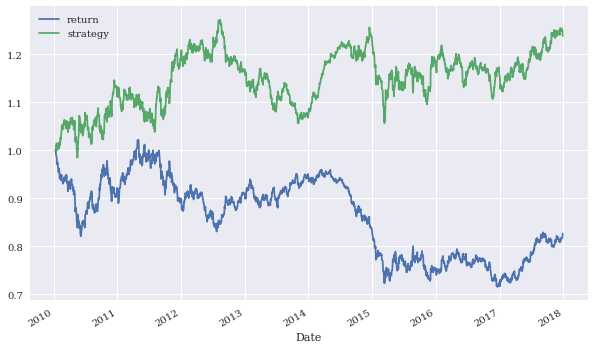

In [171]:
training_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_2.png')

In [172]:
model.evaluate(test_data_[cols], test_data['direction'])

503/503 [==============================] - 0s 29us/step


[0.7452366796449923, 0.4811133146286011]

In [173]:
pred = model.predict_classes(test_data_[cols])

In [174]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [175]:
test_data['prediction'].value_counts()

-1    256
 1    247
Name: prediction, dtype: int64

In [176]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['return'])

In [177]:
test_data[['return', 'strategy']].sum().apply(np.exp)

return      0.934478
strategy    1.026139
dtype: float64

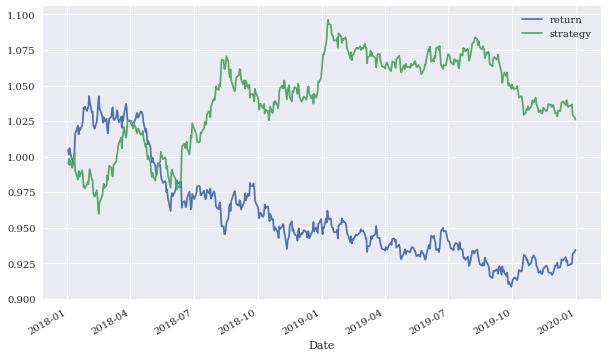

In [178]:
test_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_3.png')

### Adding Different Types of Features

In [179]:
data['momentum'] = data['return'].rolling(5).mean().shift(1)

In [180]:
data['volatility'] = data['return'].rolling(20).std().shift(1)

In [181]:
data['distance'] = (data['price'] - data['price'].rolling(50).mean()).shift(1)

In [182]:
data.dropna(inplace=True)

In [183]:
cols.extend(['momentum', 'volatility', 'distance'])

In [184]:
print(data.round(4).tail())

             price  return  direction   lag_1   lag_2   lag_3   lag_4   lag_5  \
Date                                                                            
2019-12-24  1.1087  0.0001          1  0.0007 -0.0038  0.0008 -0.0034  0.0006   
2019-12-26  1.1096  0.0008          1  0.0001  0.0007 -0.0038  0.0008 -0.0034   
2019-12-27  1.1175  0.0071          1  0.0008  0.0001  0.0007 -0.0038  0.0008   
2019-12-30  1.1197  0.0020          1  0.0071  0.0008  0.0001  0.0007 -0.0038   
2019-12-31  1.1210  0.0012          1  0.0020  0.0071  0.0008  0.0001  0.0007   

            momentum  volatility  distance  
Date                                        
2019-12-24   -0.0010      0.0024    0.0005  
2019-12-26   -0.0011      0.0024    0.0004  
2019-12-27   -0.0003      0.0024    0.0012  
2019-12-30    0.0010      0.0028    0.0089  
2019-12-31    0.0021      0.0028    0.0110  


In [185]:
training_data = data[data.index < cutoff].copy()

In [186]:
mu, std = training_data.mean(), training_data.std()

In [187]:
training_data_ = (training_data - mu) / std

In [188]:
test_data = data[data.index >= cutoff].copy() 

In [189]:
test_data_ = (test_data - mu) / std

In [190]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
                input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [191]:
%%time 
model.fit(training_data_[cols], training_data['direction'],
          verbose=False, epochs=25)

CPU times: user 2.9 s, sys: 483 ms, total: 3.38 s
Wall time: 1.99 s


In [192]:
model.evaluate(training_data_[cols], training_data['direction'])

1957/1957 [==============================] - 0s 23us/step


[0.6812173691585348, 0.5462442636489868]

In [193]:
pred = model.predict_classes(training_data_[cols])

In [194]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [195]:
training_data['strategy'] = training_data['prediction'] * \
                            training_data['return']

In [196]:
training_data[['return', 'strategy']].sum().apply(np.exp)

return      0.901074
strategy    1.815211
dtype: float64

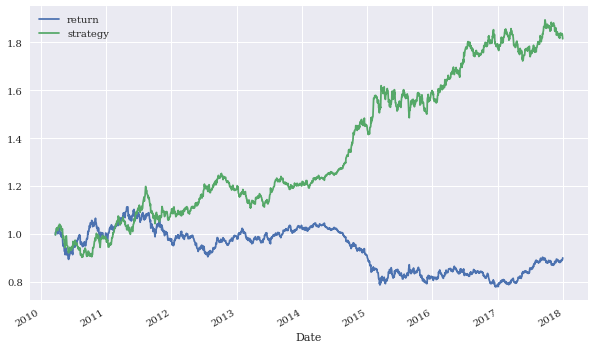

In [197]:
training_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_4.png')

In [198]:
model.evaluate(test_data_[cols], test_data['direction'])

503/503 [==============================] - 0s 22us/step


[0.6964824583611005, 0.4990059733390808]

In [199]:
pred = model.predict_classes(test_data_[cols])

In [200]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [201]:
test_data['prediction'].value_counts()

-1    339
 1    164
Name: prediction, dtype: int64

In [202]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['return'])

In [203]:
test_data[['return', 'strategy']].sum().apply(np.exp)

return      0.934478
strategy    1.109780
dtype: float64

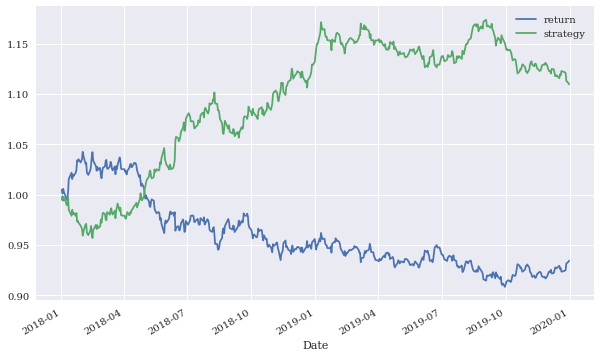

In [204]:
test_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_5.png')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>